In [2]:
pip install opencv-python


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install tensorflow



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
from glob import glob
import os
import pandas as pd
import cv2
import numpy as np
import shutil
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
import tensorflow.image as tfi
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img

In [5]:
def load_image(image,size):
    return np.round(tfi.resize(img_to_array(load_img(image))/255.,(size,size)),4)

def load_images(images_paths, size, mask=False, trim=None):
    if trim is not None:
        images_paths=image_paths[:trim]
    if mask:
        images=np.zeros(shape=(len(images_paths),size,size,1))
    else:
        images=np.zeros(shape=(len(images_paths),size,size,3))
    for i,image in enumerate(images_paths):
        img=np.round(tfi.resize(img_to_array(load_img(image))/255.,(size,size)),4)
        if mask:
            images[i]=img[:,:,:1]
        else:
            images[i]=img
    return images 

def show_image(image, title=None, cmap=None, alpha=1):
    plt.imshow(image, cmap=cmap, alpha=alpha)
    if title is not None:
        plt.title(title)
    plt.axis('off')

#Function uses the matplotlib function to show originial image with the mask overtop. 
def show_mask(image, mask, cmap=None, alpha=0.4):
    plt.imshow(image)
    plt.imshow(tf.squeeze(mask), cmap=cmap, alpha=alpha)
    plt.axis('off')

In [6]:
size=250
root_path='Brain_MRI/'
classes=sorted(os.listdir(root_path))
classes

['TCGA_CS_4941_19960909',
 'TCGA_CS_4942_19970222',
 'TCGA_CS_4943_20000902',
 'TCGA_CS_4944_20010208',
 'TCGA_CS_5393_19990606',
 'TCGA_CS_5395_19981004',
 'TCGA_CS_5396_20010302',
 'TCGA_CS_5397_20010315',
 'TCGA_CS_6186_20000601',
 'TCGA_CS_6188_20010812',
 'TCGA_CS_6290_20000917',
 'TCGA_CS_6665_20010817',
 'TCGA_CS_6666_20011109',
 'TCGA_CS_6667_20011105',
 'TCGA_CS_6668_20011025',
 'TCGA_CS_6669_20020102',
 'TCGA_DU_5849_19950405',
 'TCGA_DU_5851_19950428',
 'TCGA_DU_5852_19950709',
 'TCGA_DU_5853_19950823',
 'TCGA_DU_5854_19951104',
 'TCGA_DU_5855_19951217',
 'TCGA_DU_5871_19941206',
 'TCGA_DU_5872_19950223',
 'TCGA_DU_5874_19950510',
 'TCGA_DU_6399_19830416',
 'TCGA_DU_6400_19830518',
 'TCGA_DU_6401_19831001',
 'TCGA_DU_6404_19850629',
 'TCGA_DU_6405_19851005',
 'TCGA_DU_6407_19860514',
 'TCGA_DU_6408_19860521',
 'TCGA_DU_7008_19830723',
 'TCGA_DU_7010_19860307',
 'TCGA_DU_7013_19860523',
 'TCGA_DU_7014_19860618',
 'TCGA_DU_7018_19911220',
 'TCGA_DU_7019_19940908',
 'TCGA_DU_72

In [7]:
single_mask_paths=single_mask_paths = sorted([sorted(glob(root_path + name + "/*mask.tif")) for name in classes])
print(single_mask_paths)
image_paths=[]
mask_paths=[]
for class_path in single_mask_paths:
    for path in class_path:
        img_path=path.replace('_mask','')
        image_paths.append(img_path)
        mask_paths.append(path)

[['Brain_MRI/TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_10_mask.tif', 'Brain_MRI/TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_11_mask.tif', 'Brain_MRI/TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_12_mask.tif', 'Brain_MRI/TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_13_mask.tif', 'Brain_MRI/TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_14_mask.tif', 'Brain_MRI/TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_15_mask.tif', 'Brain_MRI/TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_16_mask.tif', 'Brain_MRI/TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_17_mask.tif', 'Brain_MRI/TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_18_mask.tif', 'Brain_MRI/TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_19_mask.tif', 'Brain_MRI/TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_1_mask.tif', 'Brain_MRI/TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_20_mask.tif', 'Brain_MRI/TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_21_mask.tif', 'Brain_MRI/TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_22_mask.tif', 'Brain_MRI/TCGA_CS_

In [8]:
print(len(image_paths))
print(image_paths)

3929
['Brain_MRI/TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_10.tif', 'Brain_MRI/TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_11.tif', 'Brain_MRI/TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_12.tif', 'Brain_MRI/TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_13.tif', 'Brain_MRI/TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_14.tif', 'Brain_MRI/TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_15.tif', 'Brain_MRI/TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_16.tif', 'Brain_MRI/TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_17.tif', 'Brain_MRI/TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_18.tif', 'Brain_MRI/TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_19.tif', 'Brain_MRI/TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_1.tif', 'Brain_MRI/TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_20.tif', 'Brain_MRI/TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_21.tif', 'Brain_MRI/TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_22.tif', 'Brain_MRI/TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_23.tif', 'Brain_MRI/TCGA_CS_4

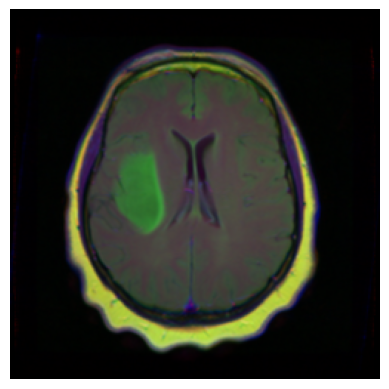

In [9]:
show_image(load_image(image_paths[25], size))

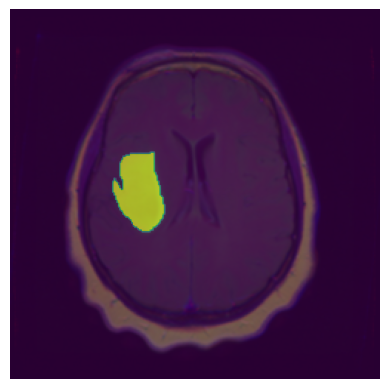

In [10]:
show_mask(load_image(image_paths[25], size), load_image(mask_paths[25], size)[:,:,0], alpha=0.6)

In [11]:
images = load_images(image_paths, size)
masks = load_images(mask_paths, size, mask=True)

In [12]:
def plot_img_grid(rows, columns, list_img_path, list_mask_path):
    fig = plt.figure(figsize=(13,8))
    for i in range(1, rows * columns + 1):
        fig.add_subplot(rows, columns, i)
        id = np.random.randint(len(images))
        show_mask(images[id], masks[id], cmap='brg')
    plt.tight_layout()
    plt.show()

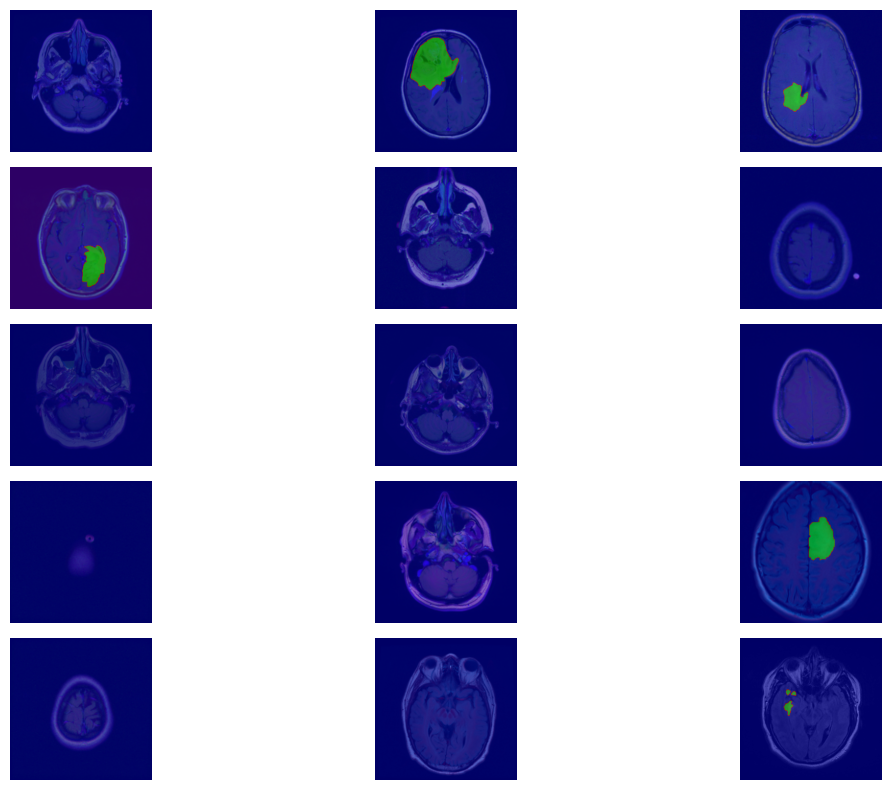

In [13]:
plot_img_grid(5,3 , image_paths, mask_paths )

In [14]:
df = pd.DataFrame(data={'images': image_paths, 'mask': mask_paths })
#Splitting data into train and test with 10% for testing and 90% training. 
df_train, df_test = train_test_split(df, test_size=0.1)

#Splitting training data with 25% alloted to validation.
df_train, df_val = train_test_split(df_train, test_size=0.25)

print(df_train.shape)
print(df_test.shape)
print(df_val.shape)

(2652, 2)
(393, 2)
(884, 2)


In [15]:
images_train= load_images(df_train['images'], size)
masks_train = load_images(df_train['mask'], size, mask=True)
images_val= load_images(df_val['images'], size)
masks_val = load_images(df_val['mask'], size, mask=True)

In [16]:
# Define the Channel Attention (CA) Module
class ChannelAttention(layers.Layer):
    def __init__(self, in_channels, reduction_ratio=16):
        super(ChannelAttention, self).__init__()
        self.global_avg_pool = layers.GlobalAveragePooling2D()
        self.global_max_pool = layers.GlobalMaxPooling2D()
        self.fc1 = layers.Dense(in_channels // reduction_ratio, activation='relu', use_bias=False)
        self.fc2 = layers.Dense(in_channels, activation='sigmoid', use_bias=False)

    def call(self, x):
        avg_out = self.fc2(self.fc1(self.global_avg_pool(x)))
        max_out = self.fc2(self.fc1(self.global_max_pool(x)))
        return x * (avg_out + max_out)

# Define the Spatial Attention (SA) Module
class SpatialAttention(layers.Layer):
    def __init__(self, kernel_size=7):
        super(SpatialAttention, self).__init__()
        self.conv = layers.Conv2D(1, kernel_size=kernel_size, padding='same', activation='sigmoid')

    def call(self, x):
        avg_out = layers.Lambda(lambda x: tf.reduce_mean(x, axis=-1, keepdims=True))(x)
        max_out = layers.Lambda(lambda x: tf.reduce_max(x, axis=-1, keepdims=True))(x)
        x = layers.Concatenate(axis=-1)([avg_out, max_out])
        return x * self.conv(x)

# Define the Combined Attention (CA + SA) Module
class CombinedAttention(layers.Layer):
    def __init__(self, in_channels, reduction_ratio=16, spatial_kernel_size=7):
        super(CombinedAttention, self).__init__()
        self.channel_attention = ChannelAttention(in_channels, reduction_ratio)
        self.spatial_attention = SpatialAttention(spatial_kernel_size)

    def call(self, x):
        x = self.channel_attention(x)
        x = self.spatial_attention(x)
        return x



In [58]:
# Define data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Apply data augmentation on images and masks
def augment_images(images, masks):
    image_gen = datagen.flow(images, batch_size=BATCH_SIZE, seed=42)
    mask_gen = datagen.flow(masks, batch_size=BATCH_SIZE, seed=42)

    while True:
        # Yield augmented images and masks
        img_batch = next(image_gen)
        mask_batch = next(mask_gen)

        # Resize images and masks to the expected target size
        img_batch_resized = tf.image.resize(img_batch, (256,256))
        mask_batch_resized = tf.image.resize(mask_batch, (256,256))

        # Ensure masks are in the correct shape (e.g., (size,size, 1))
        if mask_batch_resized.shape[-1] != 1:
            mask_batch_resized = np.expand_dims(mask_batch_resized, axis=-1)

        # Ensure image shape is (256, 256, 3)
        img_batch_resized = tf.cast(img_batch_resized, dtype=tf.float32)
        
        yield img_batch_resized, mask_batch_resized


In [47]:
from keras.optimizers import Adam

In [67]:
# Model defined and fine-tuned ResNet by freezing top layers of ResNet to preserve pre-learned features and avoid overwriting useful, generic patterns while fine-tuning task-specific layers.

def unet_with_resnet_attention(input_size=(256, 256, 3), fine_tune_from_layer=140):
    inputs = layers.Input(input_size)

    # Use ResNet50 as Encoder (Pre-trained, without top layers)
    resnet_encoder = ResNet50(weights='imagenet', include_top=False, input_shape=input_size)

    # Fine-tuning ResNet layers starting from the specified layer
    for layer in resnet_encoder.layers[:fine_tune_from_layer]:
        layer.trainable = False  # Freeze the layers before the specified layer

    for layer in resnet_encoder.layers[fine_tune_from_layer:]:
        layer.trainable = True  # Fine-tune the layers starting from the specified layer

    # Encoder from ResNet50
    x1 = resnet_encoder(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    # Continuing the encoder path
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    # Bottleneck
    b = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p2)

    # Expanding Path with Attention
    u1 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(b)
    u1 = layers.concatenate([u1, c2])
    u1 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u1)

    u2 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(u1)
    u2 = layers.concatenate([u2, c1])
    u2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u2)

    u3 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(u2)
    u3 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u3)

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid', padding='same')(u2)
    model = models.Model(
        inputs=[inputs], 
        outputs=[outputs]
    )

    # Define optimizer with different learning rates for different layers
    base_lr = 1e-4  # Low learning rate for fine-tuned layers
    full_lr = 1e-3  # Regular learning rate for non-fine-tuned layers

    # Create a list of layers for fine-tuning and others
    fine_tune_layers = [layer for layer in resnet_encoder.layers[fine_tune_from_layer:]]
    non_fine_tune_layers = [layer for layer in model.layers if layer not in fine_tune_layers]

    # Group the layers for optimizer setup
    fine_tune_params = [layer.trainable_weights for layer in fine_tune_layers]
    non_fine_tune_params = [layer.trainable_weights for layer in non_fine_tune_layers]

    # Create a custom optimizer that applies different learning rates
    optimizer = Adam(learning_rate=base_lr)

    # Compile the model with the custom optimizer
    model.compile(
        optimizer=optimizer, 
        loss='binary_crossentropy', 
        metrics=['accuracy', tf.keras.metrics.MeanIoU(num_classes=2, name='IoU')]
    )
    model.summary()

    return model

model = unet_with_resnet_attention(input_size=(256,256, 3))

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_26      │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet50            │ (None, 8, 8,      │ 23,587,712 │ input_layer_26[0… │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_145 (Conv2D) │ (None, 8, 8, 64)  │  1,179,712 │ resnet50[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_26    │ (None, 4, 4, 64)  │          0 │ conv2d_145[0][0]  │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_146 (Conv2D) │ (None, 4, 4, 128) │     73,856 │ max_pooling2d_26… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_27    │ (None, 2, 2, 128) │          0 │ conv2d_146[0][0]  │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_147 (Conv2D) │ (None, 2, 2, 512) │    590,336 │ max_pooling2d_27… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_27 │ (None, 4, 4, 256) │    524,544 │ conv2d_147[0][0]  │
│ (Conv2DTranspose)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_264     │ (None, 4, 4, 384) │          0 │ conv2d_transpose… │
│ (Concatenate)       │                   │            │ conv2d_146[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_148 (Conv2D) │ (None, 4, 4, 256) │    884,992 │ concatenate_264[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_28 │ (None, 8, 8, 128) │    131,200 │ conv2d_148[0][0]  │
│ (Conv2DTranspose)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_265     │ (None, 8, 8, 192) │          0 │ conv2d_transpose… │
│ (Concatenate)       │                   │            │ conv2d_145[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_149 (Conv2D) │ (None, 8, 8, 128) │    221,312 │ concatenate_265[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_151 (Conv2D) │ (None, 8, 8, 1)   │        129 │ conv2d_149[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 27,193,793 (103.74 MB)

 Trainable params: 18,584,129 (70.89 MB)

 Non-trainable params: 8,609,664 (32.84 MB)

In [68]:
# Model defined and fine-tuned ResNet by freezing top layers of ResNet to preserve pre-learned features and avoid overwriting useful, generic patterns while fine-tuning task-specific layers.

def unet_with_resnet_attention(input_size=(256, 256, 3), fine_tune_from_layer=140):
    inputs = layers.Input(input_size)

    # Encoder path: use standard Conv2D layers for the encoder
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    c1 = CombinedAttention(64)(c1)  # Apply Attention
    p1 = layers.MaxPooling2D((2, 2))(c1)  # Downsample

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    c2 = CombinedAttention(128)(c2)  # Apply Attention
    p2 = layers.MaxPooling2D((2, 2))(c2)  # Downsample

    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    c3 = CombinedAttention(256)(c3)  # Apply Attention
    p3 = layers.MaxPooling2D((2, 2))(c3)  # Downsample

    # Bottleneck
    b = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    b = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(b)
    b = CombinedAttention(512)(b)  # Apply Attention

    # Decoder path: use Conv2DTranspose layers to upsample
    u1 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(b)  # Upsample
    u1 = layers.concatenate([u1, c3])  # Concatenate with encoder output
    u1 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u1)
    u1 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u1)
    u1 = CombinedAttention(256)(u1)  # Apply Attention

    u2 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(u1)  # Upsample
    u2 = layers.concatenate([u2, c2])  # Concatenate with encoder output
    u2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u2)
    u2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u2)
    u2 = CombinedAttention(128)(u2)  # Apply Attention

    u3 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(u2)  # Upsample
    u3 = layers.concatenate([u3, c1])  # Concatenate with encoder output
    u3 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u3)
    u3 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u3)
    u3 = CombinedAttention(64)(u3)  # Apply Attention

    # Final output layer
    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid', padding='same')(u3)

    # Create the model
    model = models.Model(inputs=[inputs], outputs=[outputs])

    # Define optimizer
    optimizer = Adam(learning_rate=1e-4)

    # Compile the model
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.MeanIoU(num_classes=2, name='IoU')]
    )

    # Display the model summary
    model.summary()

    return model

# Create the model
model = unet_with_resnet_attention(input_size=(256, 256, 3))

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_28      │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_152 (Conv2D) │ (None, 256, 256,  │      1,792 │ input_layer_28[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_153 (Conv2D) │ (None, 256, 256,  │     36,928 │ conv2d_152[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ combined_attention… │ (None, 256, 256,  │        611 │ conv2d_153[0][0]  │
│ (CombinedAttention) │ 2)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_28    │ (None, 128, 128,  │          0 │ combined_attenti… │
│ (MaxPooling2D)      │ 2)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_155 (Conv2D) │ (None, 128, 128,  │      2,432 │ max_pooling2d_28… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_156 (Conv2D) │ (None, 128, 128,  │    147,584 │ conv2d_155[0][0]  │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ combined_attention… │ (None, 128, 128,  │      2,147 │ conv2d_156[0][0]  │
│ (CombinedAttention) │ 2)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_29    │ (None, 64, 64, 2) │          0 │ combined_attenti… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_158 (Conv2D) │ (None, 64, 64,    │      4,864 │ max_pooling2d_29… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_159 (Conv2D) │ (None, 64, 64,    │    590,080 │ conv2d_158[0][0]  │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ combined_attention… │ (None, 64, 64, 2) │      8,291 │ conv2d_159[0][0]  │
│ (CombinedAttention) │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_30    │ (None, 32, 32, 2) │          0 │ combined_attenti… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_161 (Conv2D) │ (None, 32, 32,    │      9,728 │ max_pooling2d_30… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_162 (Conv2D) │ (None, 32, 32,    │  2,359,808 │ conv2d_161[0][0]  │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ combined_attention… │ (None, 32, 32, 2) │     32,867 │ conv2d_162[0][0]  │
│ (CombinedAttention) │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_30 │ (None, 64, 64,    │      2,304 │ combined_attenti

 Total params: 4,769,464 (18.19 MB)

 Trainable params: 4,769,464 (18.19 MB)

 Non-trainable params: 0 (0.00 B)

In [65]:
# Model defined and fine-tuned ResNet by freezing top layers of ResNet to preserve pre-learned features and avoid overwriting useful, generic patterns while fine-tuning task-specific layers.

def unet_with_resnet_attention(input_size=(256, 256, 3), fine_tune_from_layer=140):
    inputs = layers.Input(input_size)

    # Use ResNet50 as Encoder (Pre-trained, without top layers)
    resnet_encoder = ResNet50(weights='imagenet', include_top=False, input_shape=input_size)

    # Fine-tuning ResNet layers starting from the specified layer
    for layer in resnet_encoder.layers[:fine_tune_from_layer]:
        layer.trainable = False  # Freeze the layers before the specified layer

    for layer in resnet_encoder.layers[fine_tune_from_layer:]:
        layer.trainable = True  # Fine-tune the layers starting from the specified layer

    # Encoder from ResNet50
    x1 = resnet_encoder(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x1)
    c1 = CombinedAttention(64)(c1)  # Apply Attention
    p1 = layers.MaxPooling2D((2, 2))(c1)

    # Continuing the encoder path
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = CombinedAttention(128)(c2)  # Apply Attention
    p2 = layers.MaxPooling2D((2, 2))(c2)

    # Bottleneck
    b = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p2)
    b = CombinedAttention(512)(b)  # Apply Attention

    # Expanding Path with Attention
    u1 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(b)
    u1 = layers.concatenate([u1, c2])
    u1 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u1)
    u1 = CombinedAttention(256)(u1)  # Apply Attention

    u2 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(u1)
    u2 = layers.concatenate([u2, c1])
    u2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u2)
    u2 = CombinedAttention(128)(u2)  # Apply Attention

    u3 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(u2)
    u3 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u3)
    u3 = CombinedAttention(64)(u3)

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid', padding='same')(u2)
    model = models.Model(
        inputs=[inputs], 
        outputs=[outputs]
    )

    # Define optimizer with different learning rates for different layers
    base_lr = 1e-4  # Low learning rate for fine-tuned layers
    full_lr = 1e-3  # Regular learning rate for non-fine-tuned layers

    # Create a list of layers for fine-tuning and others
    fine_tune_layers = [layer for layer in resnet_encoder.layers[fine_tune_from_layer:]]
    non_fine_tune_layers = [layer for layer in model.layers if layer not in fine_tune_layers]

    # Group the layers for optimizer setup
    fine_tune_params = [layer.trainable_weights for layer in fine_tune_layers]
    non_fine_tune_params = [layer.trainable_weights for layer in non_fine_tune_layers]

    # Create a custom optimizer that applies different learning rates
    optimizer = Adam(learning_rate=base_lr)

    # Compile the model with the custom optimizer
    model.compile(
        optimizer=optimizer, 
        loss='binary_crossentropy', 
        metrics=['accuracy', tf.keras.metrics.MeanIoU(num_classes=2, name='IoU')]
    )
    model.summary()

    return model

model = unet_with_resnet_attention(input_size=(256,256, 3))



Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_24      │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet50            │ (None, 8, 8,      │ 23,587,712 │ input_layer_24[0… │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_132 (Conv2D) │ (None, 8, 8, 64)  │  1,179,712 │ resnet50[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ combined_attention… │ (None, 8, 8, 2)   │        611 │ conv2d_132[0][0]  │
│ (CombinedAttention) │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_24    │ (None, 4, 4, 2)   │          0 │ combined_attenti… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_134 (Conv2D) │ (None, 4, 4, 128) │      2,432 │ max_pooling2d_24… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ combined_attention… │ (None, 4, 4, 2)   │      2,147 │ conv2d_134[0][0]  │
│ (CombinedAttention) │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_25    │ (None, 2, 2, 2)   │          0 │ combined_attenti… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_136 (Conv2D) │ (None, 2, 2, 512) │      9,728 │ max_pooling2d_25… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ combined_attention… │ (None, 2, 2, 2)   │     32,867 │ conv2d_136[0][0]  │
│ (CombinedAttention) │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_24 │ (None, 4, 4, 256) │      2,304 │ combined_attenti… │
│ (Conv2DTranspose)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_248     │ (None, 4, 4, 258) │          0 │ conv2d_transpose… │
│ (Concatenate)       │                   │            │ combined_attenti… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_138 (Conv2D) │ (None, 4, 4, 256) │    594,688 │ concatenate_248[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ combined_attention… │ (None, 4, 4, 2)   │      8,291 │ conv2d_138[0][0]  │
│ (CombinedAttention) │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_25 │ (None, 8, 8, 128) │      1,152 │ combined_attenti… │
│ (Conv2DTranspose)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_252     │ (None, 8, 8, 130) │          0 │ conv2d_transpose… │
│ (Concatenate)       │                   │            │ combined_attenti… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_140 (Conv2D) │ (None, 8, 8, 128) │    149,888 │ concatenate_252[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ combined_attention… │ (None, 8, 8, 2)   │      2,147 │ conv2d_140[0][0]  │
│ (CombinedAttention) │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 25,573,682 (97.56 MB)

 Trainable params: 16,964,018 (64.71 MB)

 Non-trainable params: 8,609,664 (32.84 MB)

In [56]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluation Metrics
def iou_metric(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    union = np.sum(y_true) + np.sum(y_pred) - intersection
    return intersection / union if union != 0 else 0

def dice_coefficient(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    return 2 * intersection / (np.sum(y_true) + np.sum(y_pred))

def precision(y_true, y_pred):
    return precision_score(y_true.flatten(), y_pred.flatten(), average='binary')

def recall(y_true, y_pred):
    return recall_score(y_true.flatten(), y_pred.flatten(), average='binary')

def f1(y_true, y_pred):
    return f1_score(y_true.flatten(), y_pred.flatten(), average='binary')


In [72]:
BATCH_SIZE = 5
EPOCHS = 5
result = model.fit(
    augment_images(images_train, masks_train),  # Use the data generator here
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data= augment_images(images_train, masks_train),
    validation_steps=len(images_val)//BATCH_SIZE,
    steps_per_epoch=len(images_train)
)

MemoryError: Unable to allocate 1.85 GiB for an array with shape (2652, 250, 250, 3) and data type float32

In [ ]:

# Evaluate the model on the test data
test_images = load_images(df_test['images'], size)
test_masks = load_images(df_test['mask'], size, mask=True)

# For testing, we don't need augmentation during evaluation
test_loss, test_acc = model.evaluate(test_images, test_masks, batch_size=BATCH_SIZE)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

In [ ]:

predictions = model.predict(test_images)

def show_prediction(image, mask, prediction):
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 3, 1)
    show_image(image)
    plt.subplot(1, 3, 2)
    show_mask(image, mask, cmap='brg', alpha=0.6)
    plt.subplot(1, 3, 3)
    show_mask(image, prediction, cmap='brg', alpha=0.6)
    plt.show()

# Show a few predictions
for i in range(5):
    show_prediction(test_images[i], test_masks[i], predictions[i])


In [ ]:
# Get predictions
predictions = model.predict(test_images)
predictions = (predictions > 0.5).astype(np.float32)  # Convert to binary masks

# Calculate evaluation metrics
test_iou = iou_metric(test_masks, predictions)
test_dice = dice_coefficient(test_masks, predictions)
test_prec = precision(test_masks, predictions)
test_rec = recall(test_masks, predictions)
test_f1s = f1(test_masks, predictions)

# Print evaluation metrics
print("Test Metrics:")
print(f"IoU: {test_iou:.4f}")
print(f"Dice Coefficient: {test_dice:.4f}")
print(f"Precision: {test_prec:.4f}")
print(f"Recall: {test_rec:.4f}")
print(f"F1 Score: {test_f1s:.4f}")

In [ ]:
def unet_model(input_size=(256, 256, 3)):
    inputs = layers.Input(input_size)

    # Contracting path
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    # Bottleneck
    b = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)

    # Expanding path
    u1 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(b)
    u1 = layers.concatenate([u1, c1])
    u1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u1)

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(u1)

    model = models.Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = unet_model()
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 256, 256,  │      1,792 │ input_layer_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 256, 256,  │     36,928 │ conv2d_5[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 128, 128,  │          0 │ conv2d_6[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 128, 128,  │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_1  │ (None, 256, 256,  │     32,832 │ conv2d_7[0][0]    │
│ (Conv2DTranspose)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 256, 256,  │          0 │ conv2d_transpose… │
│ (Concatenate)       │ 128)              │            │ conv2d_6[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 256, 256,  │     73,792 │ concatenate_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 256, 256,  │         65 │ conv2d_8[0][0]    │
│                     │ 1)                │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 219,265 (856.50 KB)

 Trainable params: 219,265 (856.50 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
# Train the model
BATCH_SIZE=8
EPOCHS=20
result=model.fit(
    images_train,masks_train,
    batch_size=BATCH_SIZE, 
    epochs=EPOCHS,
    steps_per_epoch=len(images_train)//BATCH_SIZE,
    validation_data= (images_val, masks_val),
    validation_steps=len(images_val)//BATCH_SIZE
)


MemoryError: Unable to allocate 1.85 GiB for an array with shape (2652, 250, 250, 3) and data type float32